<a href="https://colab.research.google.com/github/Denji-1/Data_Analytics_with_Python/blob/main/Assessment/Data_Analytics_with_Python_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This assessment aims to evaluate your understanding and application of the concepts covered in the Data Analytics course. You will be tasked with analyzing a dataset related to remote work and mental health, utilizing various data manipulation, statistical analysis, and visualization techniques learned throughout the course. This exercise will help reinforce your skills in data handling, exploratory analysis, and drawing meaningful insights from data.

### Submission Details:

The deadline for submission is 16 November at 11:59 PM. Specific submission details will be shared with you shortly.

### Passing Criteria:

To successfully pass this assessment, you must achieve a score of 80% or higher.
We encourage you to engage with the material and demonstrate your analytical skills. Good luck!


---



# Section 1 - Beginner (25%)


## Shopping Cart System with Discounts

Write a Python program to simulate a shopping cart system for an online store. The program will calculate the total cost of items, apply discounts, and check if the total exceeds a specified budget.

1.	Variables and Lists:
  - Define a `budget` variable with an initial value of 200.
  
  - Create two empty lists called `item_names_list` and `item_prices_list` to store the name and price of each item separately.

In [ ]:
#initialize budget and create empty lists for item names and prices
budget = 200
item_names_list = []
item_prices_list = []

2. Functions:
  - Write a function `add_item_to_cart(item_name, item_price)` that takes the item’s name and price as arguments, appends the name to item_names and the price to item_prices, and returns both updated lists.
  
  - Write a function `calculate_total(item_prices)` that calculates and returns the total cost of all items in item_prices.

    Conditions:
    - If the total cost exceeds the budget after adding an item, print "Budget exceeded!" and stop adding more items.
    - If the total cost is within budget and exceeds $100, apply a 10% discount on the total and print the discounted total.

In [ ]:
# Function to add an item to the cart
def add_item_to_cart(item_name, item_price):
  item_names_list.append(item_name)
  item_prices_list.append(item_price - discount)
  return item_names_list, item_prices_list

#Function to calculate the total cost of the items in the cart
def calculate_total(item_price):
  total_cost = sum(item_price)
  discount = 0
  # Check if the total cost exceeds the budget
  if total_cost > budget:
        print("Budget exceeded!")

  # Apply discount if total exceeds $100
  if total_cost <= budget and total_cost > 100:
      discount = total_cost * 0.1
      total_cost-= discount
      print(f"Total cost after 10% discount : ${total_cost:.2f}")
  return total_cost, discount


3.	Loop and Input:
  - Start the input only once the user says 'start'
  - Use a loop to allow the user to add items to the cart by entering an item name and price. The loop should stop when the user types 'done'.
  - For each item, add it to item_names and item_prices using add_item_to_cart, then update the total cost using calculate_total.

Output:
  - After the loop ends, display the final cart with each item and its price, the initial total, any applicable discount, and the final total.


In [ ]:
user_input = input("Type 'start' to begin adding items to your cart: ").strip().lower()

while True:
 if user_input == 'start':

         item_name = input("Enter the item name (or type 'done' to finish): ").strip()

         if item_name.lower() == 'done':
             break  # Exit the loop if 'done' is typed

         try:
             item_price = float(input("Enter the item price: ").strip())
         except ValueError:
             print("Invalid price. Please enter a numeric value.")
             continue  # Skip this iteration and prompt for the item again


         # Add item to cart
         add_item_to_cart(item_name, item_price)

         # Calculate total and check if budget is exceeded
         total_cost, discount = calculate_total(item_prices_list)

         # If budget exceeded, stop adding more items
         if total_cost > budget:
             break


 else:
  user_input = input("Invalid input. Type 'start' to begin: ").strip().lower()

Type 'start' to begin adding items to your cart: start
Enter the item name (or type 'done' to finish): rice
Enter the item price: 80
Enter the item name (or type 'done' to finish): apple
Enter the item price: 30
Total cost after 10% discount : $99.00
Enter the item name (or type 'done' to finish): done


In [ ]:
# Final output after exiting the loop
print("\nFinal Cart Summary:")
for i in range(len(item_names_list)):
    print(f"{item_names_list[i]}: ${item_prices_list[i]:.2f}")

initial_total = sum(item_prices_list)
print(f"\nInitial Total: ${initial_total:.2f}")
if discount > 0:
    print(f"Discount Applied: ${discount:.2f}")
else:
  print("Discount Applied: ", 0)
print(f"Final Total: ${total_cost:.2f}")


Final Cart Summary:
rice: $80.00
apple: $30.00

Initial Total: $110.00
Discount Applied: $11.00
Final Total: $99.00


# Section 2 - Intermidiate (55%) - Remote Work and Mental Health Analysis

Dataset source: Kaggle (https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health)




## Objective:
- In the following sections, you will explore the "Remote Work and Mental Health" dataset using Python and different data science libraries such as Pandas, NumPy and Matplotlib.
- Follow the instructions below to complete each task. Please provide code for each question and any observations as comments when necessary.

In [13]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For statistical analysis
from scipy import stats
import statsmodels.api as sm


## 1. Load Dataset (2 marks)
- Instructions: Load the dataset using Pandas and display few rows.
- Question: Describe the overall structure (rows, columns, data types) as a comment at the end of your code.


In [15]:
from google.colab import files
uploaded = files.upload()

Saving Impact_of_Remote_Work_on_Mental_Health.csv to Impact_of_Remote_Work_on_Mental_Health.csv


In [21]:
# Load the dataset from the local file
df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')

# Display the first few rows
head_rows = df.head()
head_rows

# The dataset has the following structure:
# - Number of rows: 5000
# - Number of columns: 20
# - Data types:
#    - int64 (7 columns): Age, Years_of_Experience, Hours_Worked_Per_Week, Number_of_Virtual_Meetings, Work_Life_Balance_Rating, Social_Isolation_Rating, Company_Support_for_Remote_Work
#    - object (13 columns): Employee_ID, Gender, Job_Role, Industry, Work_Location, Stress_Level, Mental_Health_Condition, Access_to_Mental_Health_Resources, Productivity_Change,
#                           Satisfaction_with_Remote_Work, Physical_Activity, Sleep_Quality, Region
# - Some columns have missing values (e.g., 'Mental_Health_Condition' and 'Physical_Activity')


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


## 2. Display 'n' Rows (3 marks)
- Instructions: Display the first 13 rows of the dataset.

In [24]:
# First 13 rows
print("First 13 rows of Impact of Remote Work on Mental Health dataframe:\n")
head_13_rows = df.head(13)
head_13_rows

First 13 rows of Impact of Remote Work on Mental Health dataframe:



,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
5,EMP0006,59,Non-binary,Sales,IT,31,Hybrid,39,3,4,High,NaN,No,Increase,5,Unsatisfied,1,NaN,Average,South America
6,EMP0007,31,Prefer not to say,Sales,IT,24,Remote,51,7,3,Low,Anxiety,Yes,Decrease,5,Neutral,3,Daily,Poor,Asia
7,EMP0008,42,Non-binary,Data Scientist,Manufacturing,6,Onsite,54,7,3,Medium,Depression,No,Decrease,5,Satisfied,4,NaN,Average,North America
8,EMP0009,56,Prefer not to say,Data Scientist,Healthcare,9,Hybrid,24,4,2,High,NaN,Yes,Decrease,2,Unsatisfied,4,Daily,Poor,Europe
9,EMP0010,30,Female,HR,IT,28,Hybrid,57,6,1,Low,Depression,Yes,Decrease,2,Neutral,1,Weekly,Poor,North America


- Instructions: Display the last 7 rows of the dataset

In [25]:
# last 7 rows
print("last 7 rows of Impact of Remote Work on Mental Health dataframe\n")
tail_7_rows = df.tail(7)
tail_7_rows

last 7 rows of Impact of Remote Work on Mental Health dataframe



,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4993,EMP4994,35,Non-binary,Marketing,Retail,12,Hybrid,32,13,5,Medium,NaN,Yes,Decrease,2,Satisfied,3,Daily,Good,Asia
4994,EMP4995,40,Prefer not to say,Marketing,IT,17,Hybrid,52,1,2,Medium,Burnout,Yes,Increase,3,Neutral,5,Daily,Good,Oceania
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,Low,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


## 3. Find the Number of Null Values in the Dataset (2 mark)

In [38]:
#displays total number of null values in whole dataset
total_nulls = df.isna().sum().sum()
total_nulls

2825

## 4. Statistical Summary for Numeric Columns (10 marks)
Instructions: Use individual commands to find the statistical summary.

- Count

In [32]:
# Count of non-null values for each column
count_non_null = df.count()
count_non_null

,0
Employee_ID,5000
Age,5000
Gender,5000
Job_Role,5000
Industry,5000
Years_of_Experience,5000
Work_Location,5000
Hours_Worked_Per_Week,5000
Number_of_Virtual_Meetings,5000
Work_Life_Balance_Rating,5000


- Mean

In [44]:
#calculate the mean of all numeric columns
mean_value = df.select_dtypes(include=['int64', 'float64']).mean()
mean_value

,0
Age,40.9950
Years_of_Experience,17.8102
Hours_Worked_Per_Week,39.6146
Number_of_Virtual_Meetings,7.5590
Work_Life_Balance_Rating,2.9842
Social_Isolation_Rating,2.9938
Company_Support_for_Remote_Work,3.0078


- Standard Deviation

In [45]:
# Calculate the standard deviation for numeric columns
std_deviation = df.select_dtypes(include=['int64', 'float64']).std()
std_deviation


,0
Age,11.296021
Years_of_Experience,10.020412
Hours_Worked_Per_Week,11.860194
Number_of_Virtual_Meetings,4.636121
Work_Life_Balance_Rating,1.410513
Social_Isolation_Rating,1.394615
Company_Support_for_Remote_Work,1.399046


- Quartiles

In [46]:
# Calculate the qaartiles for numeric columns
quartiles = df.select_dtypes(include=['int64', 'float64']).quantile([0.25, 0.5, 0.75])
quartiles


,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
0.25,31.0,9.0,29.0,4.0,2.0,2.0,2.0
0.50,41.0,18.0,40.0,8.0,3.0,3.0,3.0
0.75,51.0,26.0,50.0,12.0,4.0,4.0,4.0


## 5. Calculate Extrema (2 marks)

In [52]:
# Calculate the minimum values for each numeric column
min_values = df.select_dtypes(include=['int64', 'float64']).min()
print("Minimum values for each numeric column :\n", min_values)

# Calculate the maximum values for each numeric column
max_values = df.select_dtypes(include=['int64', 'float64']).max()
print("\nMaximum values for each numeric column :\n", max_values)


Minimum values for each numeric column :
 Age                                22
Years_of_Experience                 1
Hours_Worked_Per_Week              20
Number_of_Virtual_Meetings          0
Work_Life_Balance_Rating            1
Social_Isolation_Rating             1
Company_Support_for_Remote_Work     1
dtype: int64

Maximum values for each numeric column :
 Age                                60
Years_of_Experience                35
Hours_Worked_Per_Week              60
Number_of_Virtual_Meetings         15
Work_Life_Balance_Rating            5
Social_Isolation_Rating             5
Company_Support_for_Remote_Work     5
dtype: int64


## 6. Find Unique Values in a Categorical Column (3 marks)

- Instructions: Identify the unique values in the `job_role` column (2 marks)
- Question: How many unique roles are represented in the dataset? (1 mark)

In [55]:
# Finds unique values in the Job_Role column
unique_roles = df['Job_Role'].unique()

# Displays the unique job roles
print("Unique job roles:", unique_roles)

# Counts the number of unique job roles
num_unique_roles = df['Job_Role'].nunique()
print("\nNumber of unique roles in the dataset:", num_unique_roles)


Unique job roles: ['HR' 'Data Scientist' 'Software Engineer' 'Sales' 'Marketing' 'Designer'
 'Project Manager']

Number of unique roles in the dataset: 7


## 7. Group Data and Calculate Mean (4 marks)
- Instructions: Group the dataset by `job_role` and calculate the mean of the `Work_Life_Balance_Rating` for each role.
- Question: Which job role has the highest average Work life balance?

In [60]:
# Group by 'Job_Role' and calculate the mean of 'Work_Life_Balance_Rating'
work_life_balance_means = df.groupby('Job_Role')['Work_Life_Balance_Rating'].mean()

# Display the job role with the highest average Work-Life Balance Rating
highest_wlb_role = work_life_balance_means.idxmax()
highest_wlb_rating = work_life_balance_means.max()

print("Job role with the highest average Work-Life Balance Rating:", highest_wlb_role)
print("\nAverage Work-Life Balance Rating for this role:", highest_wlb_rating)


Job role with the highest average Work-Life Balance Rating: Sales

Average Work-Life Balance Rating for this role: 3.043656207366985


## 8. Filter Data Based on Condition (4 marks)
- Instructions: Filter the dataset to show only rows where `work_hours_per_week` is greater than 40.
- Question: How many employees are working overtime?

In [63]:
# Filter the dataset to show only rows where 'Hours_Worked_Per_Week' is greater than 40
overtime_employees = df[df['Hours_Worked_Per_Week'] > 40.0]

# Display the number of employees working overtime
num_overtime_employees = overtime_employees.shape[0]

print("Number of employees working overtime:", num_overtime_employees)


Number of employees working overtime: 2384


## 9 . Histogram of Work Hours per Week (5 marks)
- Instructions: Create a histogram of `Hours_Worked_Per_Week` (4 marks).
- Question: Describe the distribution of work hours. Are most employees working around a certain number of hours per week? (1 mark)

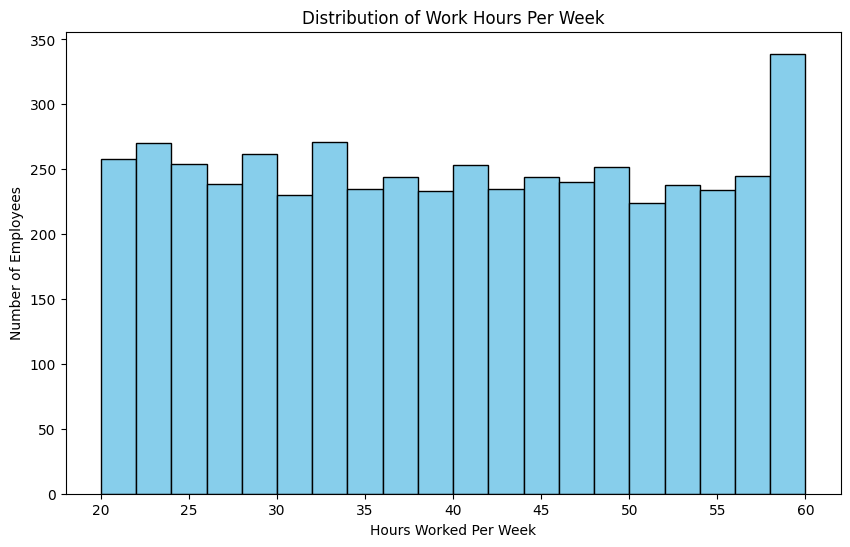

In [73]:
# Create a histogram of Hours_Worked_Per_Week
plt.figure(figsize=(10, 6))
plt.hist(df['Hours_Worked_Per_Week'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Number of Employees')
plt.title('Distribution of Work Hours Per Week')
plt.show()

#-Peak working hours: there are more employees who work around 60 hours per week (approximately 330 employees) than in other catagories.
#-General spread: Most other employees work between 20 and 58 hours per week.
#-Comparison with a 40-hour work week: Nearly half of the employees work fewer than 40 hours per week, but overall,
#                                      more employees work over 40 hours than those working 40 or fewer hours.

## 10. Scatter Plot of Work Hours vs. Years_of_Experience (4 marks)
- Instructions: Create a scatter plot with `Hours_Worked_Per_Week` on the x-axis and `Years_of_Experience` on the y-axis.

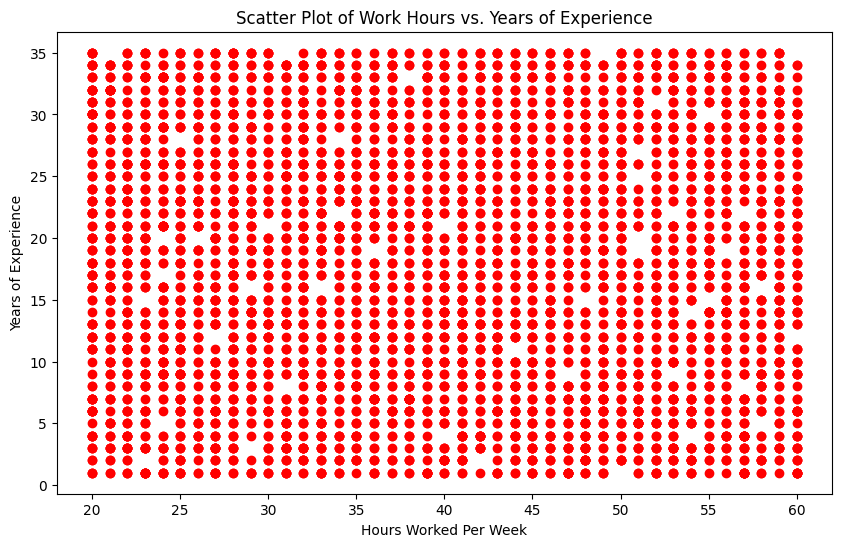

In [92]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Worked_Per_Week'], df['Years_of_Experience'], color='red', marker="o")

# Label the axes
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Years of Experience')
plt.title('Scatter Plot of Work Hours vs. Years of Experience')

# Show the plot
plt.show()

## 11. Bar Chart of Average Work Life Balance by Job Role (5 marks)
- Instructions: Create a bar chart showing the average `Work_Life_Balance_Rating` for each `Job_Role` (4 marks).
- Question: Which job roles have the highest and lowest average mental Work Life Balance? (1 mark)

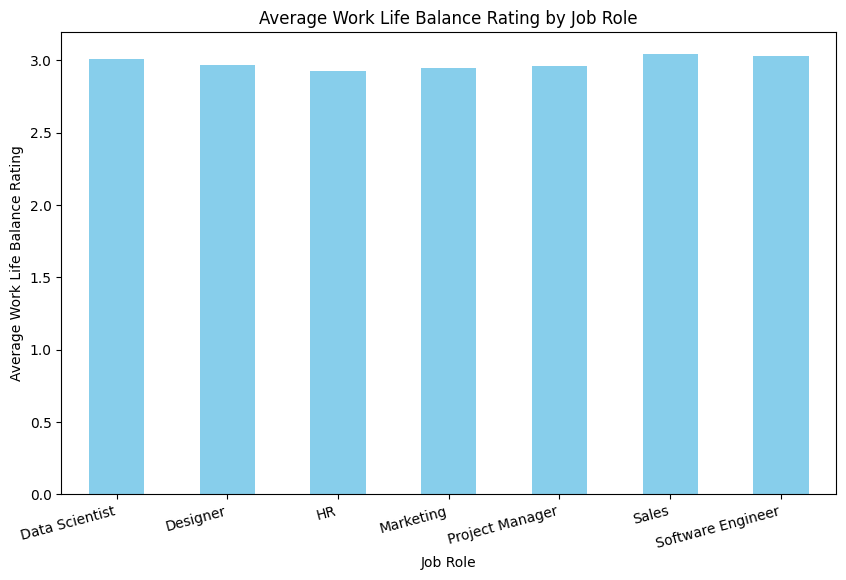


The job role with the highest average Work Life Balance Rating is: Sales

The job role with the lowest average Work Life Balance Rating is: HR


In [93]:


# Create the bar chart
plt.figure(figsize=(10, 6))
work_life_balance_means.plot(kind='bar', color='skyblue')

# Label the axes and add a title
plt.xlabel('Job Role')
plt.ylabel('Average Work Life Balance Rating')
plt.title('Average Work Life Balance Rating by Job Role')

# Display the chart
plt.xticks(rotation=15, ha='right')  # Rotate job role labels for better readability
plt.show()

# Find the job role with the highest and lowest average Work Life Balance Rating
highest_work_life_balance = work_life_balance_means.idxmax()
lowest_work_life_balance = work_life_balance_means.idxmin()

# Print the results
print(f"\nThe job role with the highest average Work Life Balance Rating is: {highest_work_life_balance}")
print(f"\nThe job role with the lowest average Work Life Balance Rating is: {lowest_work_life_balance}")


## 12. Pie Chart of Workload Level Distribution (5 marks)
- Instructions: Use a pie chart to show the proportion of `Access_to_Mental_Health_Resources` (Yes and no) in the dataset (4 marks).
- Question: What percentage of employees have access to mental health resources? (1 mark)

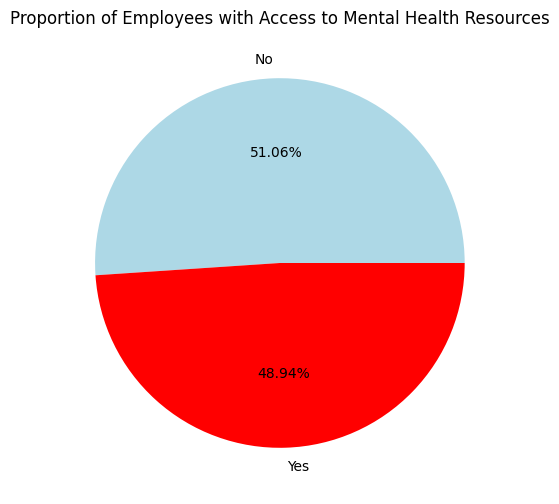


Percentage of employees with access to mental health resources: 48.94%


In [99]:
# Count the occurrences of 'Yes' and 'No' in the 'Access_to_Mental_Health_Resources' column
access_counts = df['Access_to_Mental_Health_Resources'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(access_counts, labels=access_counts.index, autopct='%1.2f%%', colors=['lightblue', 'red'])
plt.title('Proportion of Employees with Access to Mental Health Resources')
plt.show()

# Calculate the percentage of employees with access to mental health resources
percentage_with_access = (access_counts['Yes'] / access_counts.sum()) * 100
print(f"\nPercentage of employees with access to mental health resources: {percentage_with_access:.2f}%")




## 13. Scatter Plot of Age vs. Social Isolation Rating (6 marks)
- Instructions: Create a scatter plot with `age` on the x-axis and `Social_Isolation_Rating` on the y-axis (4 marks).
- Question: Do you observe any trends or relationships between age and social isolation? Is there a noticeable impact of age on isoloation? (2 marks)

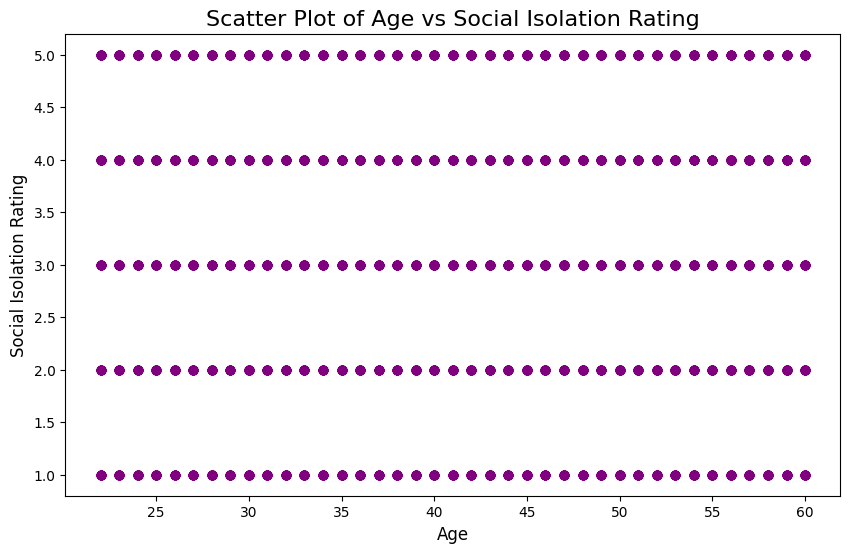

In [104]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Social_Isolation_Rating'], color='purple', marker = "o")

# Add titles and labels
plt.title('Scatter Plot of Age vs Social Isolation Rating', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Social Isolation Rating', fontsize=12)

# Show the plot
plt.show()

#Based on the scatter plot, age does not seem to have
#a noticeable impact on social isolation in this dataset. The social isolation
#ratings are fairly distributed across different ages, and there is no clear
#trend or pattern.



# Section 3 - Long Answer/Advanced (20%)



## Job Role and Workload Level Impact on Mental Health

Instructions: Investigate the influence of job roles and workload level on the mental health.
- Create a new column `workload_level` that labels each entry as "High" if the `Hours_Worked_Per_Week` is above its mean, otherwise "Low." (5 marks)
- Group the dataset by `Industry` and calculate the average `Hours_Worked_Per_Week` for each combination. (5 marks)
- Use a bar chart to display the average `Stress_Level` for each job role, with separate bars for high and low stress levels. (5 marks)
- Analyze the results: Which job roles and workload levels appear to have the greatest impact on mental health? (5 marks)


In [115]:

#Convert 'Stress_Level' categorical values to numeric
stress_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Numeric'] = df['Stress_Level'].map(stress_mapping)

# Create a new column 'workload_level' based on 'Hours_Worked_Per_Week'
mean_work_hours = df['Hours_Worked_Per_Week'].mean()
df['workload_level'] = df['Hours_Worked_Per_Week'].apply(lambda x: 'High' if x > mean_work_hours else 'Low')

# Group by 'Industry' and calculate the average 'Hours_Worked_Per_Week' for each combination
industry_avg_work_hours = df.groupby('Industry')['Hours_Worked_Per_Week'].mean()

# Display the results for step 2
print(industry_avg_work_hours)




Industry
Consulting       39.205882
Education        39.428986
Finance          39.192771
Healthcare       40.067308
IT               40.017426
Manufacturing    40.241581
Retail           39.150138
Name: Hours_Worked_Per_Week, dtype: float64


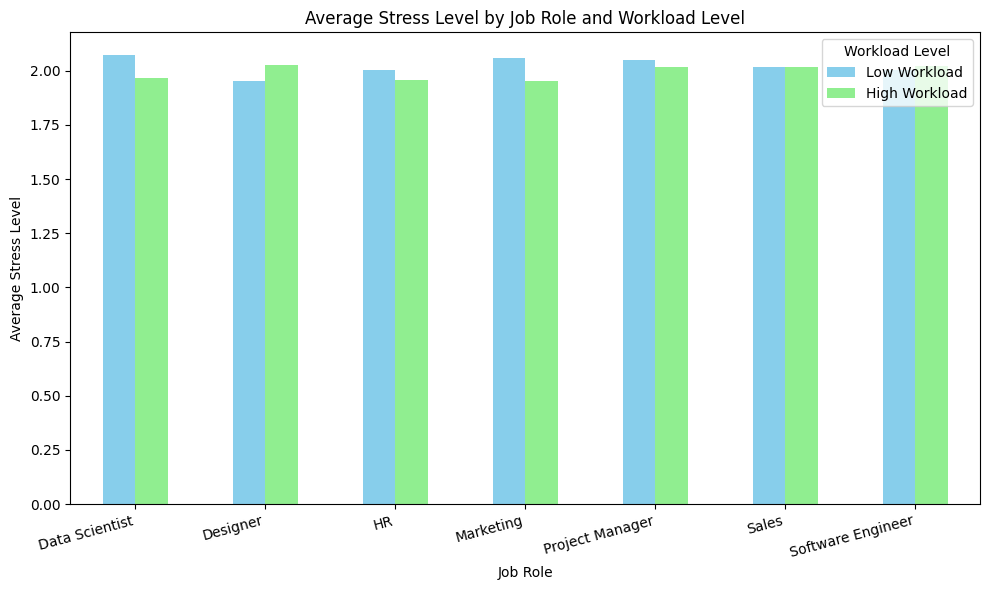

In [116]:
#Bar chart to display the average 'Stress_Level' for each job role, with separate bars for high and low stress levels
stress_by_job_role = df.groupby(['Job_Role', 'workload_level'])['Stress_Level_Numeric'].mean().unstack()

# Plotting the bar chart
stress_by_job_role.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Average Stress Level by Job Role and Workload Level')
plt.ylabel('Average Stress Level')
plt.xlabel('Job Role')
plt.xticks(rotation=15, ha='right')
plt.legend(title='Workload Level', labels=['Low Workload', 'High Workload'])
plt.tight_layout()
plt.show()

In [117]:
#Analyze the results
# Check the Stress Level averages for each job role and workload level
print(stress_by_job_role)



workload_level         High       Low
Job_Role                             
Data Scientist     2.073394  1.967480
Designer           1.950581  2.026385
HR                 2.002833  1.958678
Marketing          2.056818  1.951662
Project Manager    2.050132  2.016713
Sales              2.016086  2.016667
Software Engineer  2.002660  2.023881


Data Scientist:

 Data Scientists have the highest average stress level in the High Workload category. This may suggest that the nature of their work, combined with a higher workload, leads to increased stress. The difference between their High (2.07) and Low (1.97) workload stress levels is notable, indicating that they might be more sensitive to workload fluctuations.

Designer:

Interestingly, Designers show the lowest stress when working High Workload (1.95) and the highest stress when working Low Workload (2.02). This could be an indication that even with fewer hours, Designers may face stress from workload unpredictability, tight deadlines, or creative pressures.

Project Manager:

Project Managers have a relatively consistent stress level, with only a slight variation between High (2.02) and Low (2.02). This suggests that their stress levels might be tied to factors other than work hours, such as project complexity, team coordination, or external pressures.

HR, Marketing, and Software Engineers:

These job roles show moderate fluctuations in stress levels. For instance, Software Engineers have a slight increase in stress from 2.00 (Low Workload) to 2.02 (High Workload), suggesting that a slightly heavier workload does not affect them as dramatically as it does for Data Scientists.
HR and Marketing roles show relatively similar stress levels across the workload categories, indicating that their stress may not be highly dependent on work hours but on other variables like interpersonal interactions or administrative workload.